# Interpolation using Numba `jitclass`

### The `LinearInterpFast` class

In [1]:
import numpy as np

from HARK.interpolation import LinearInterp
from HARK.numba import LinearInterpFast

In [2]:
x = np.array([0.0, 1.0])
y = np.array([0.0, 2.0])
new_x = np.linspace(0, 1, 100)

### Instantiation takes time, the first time

Compare time to instantiation for standard linear interpolator vs. numba implementation.

In [3]:
%time interp = LinearInterp(x,y)

Wall time: 0 ns


In [4]:
%time interpFast = LinearInterpFast(x,y)

Wall time: 565 ms


As seen above, instantiating the numba implementation takes longer, but only the first time. See second instantiation below.

In [5]:
%time interpFast = LinearInterpFast(x,y)

Wall time: 0 ns


### Calling also takes time, the first time

Compare time for first call below, versus repeated calls thereafter. 

In [6]:
%time interp(new_x)

Wall time: 0 ns


array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [7]:
%time interpFast.eval(new_x)

Wall time: 1.92 s


array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

After the first call, however, we can see that repeatedly calling the numba implementation is significantly faster. 

In [8]:
%timeit interp(new_x)

16.5 µs ± 906 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit interpFast.eval(new_x)

4.36 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


   ### Limiting Decay Extrapolation

In [10]:
interp = LinearInterp(x, y, intercept_limit=0, slope_limit=1, lower_extrap=True)
interpFast = LinearInterpFast(x, y, intercept_limit=0, slope_limit=1, lower_extrap=True)
out_x = np.linspace(-1, 2, 100)
np.max(np.abs(interp(out_x) - interpFast.eval(out_x)))

0.0

### The `CubicInterpFast` class

In [11]:
from HARK.interpolation import CubicInterp

from HARK.numba import CubicInterpFast

import matplotlib.pyplot as plt

In [12]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-(x ** 2) / 9.0)
dydx = 2.0 * x / 9.0 * np.sin(-(x ** 2) / 9.0)

cubic_interp = CubicInterp(x, y, dydx, lower_extrap=True)
cubic_fast = CubicInterpFast(x, y, dydx, lower_extrap=True)

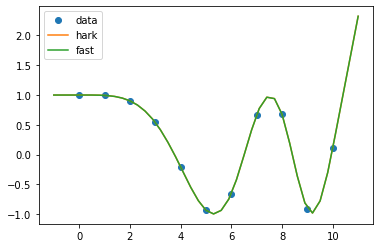

In [13]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
xout = np.linspace(-1, 11, num=41, endpoint=True)

plt.plot(x, y, "o", xout, cubic_interp(xout), "-", xout, cubic_fast.eval(xout))
plt.legend(["data", "hark", "fast"], loc="best")
plt.show()

In [14]:
np.max(np.abs(cubic_interp(xnew) - cubic_fast.eval(xnew)))

0.0

In [15]:
cubic_fast.eval(np.array([0.5]))

array([0.99999683])

In [16]:
%timeit cubic_interp(xnew)
%timeit cubic_interp(xout)

50.6 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
48.3 µs ± 901 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit cubic_fast.eval(xnew)
%timeit cubic_fast.eval(xout)

8.52 µs ± 73.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.86 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
